In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, eye
from scipy.sparse.linalg import spsolve

## 2. Signal Denoising

(a) Create a signal x = sin(10t), where t ∈ R
1000 is evenly distributed in the interval [0, 1]. Create a
noisy vector y by adding Gaussian noise with σ = 0.1. Plot the true and the noisy signal against
the variable t.

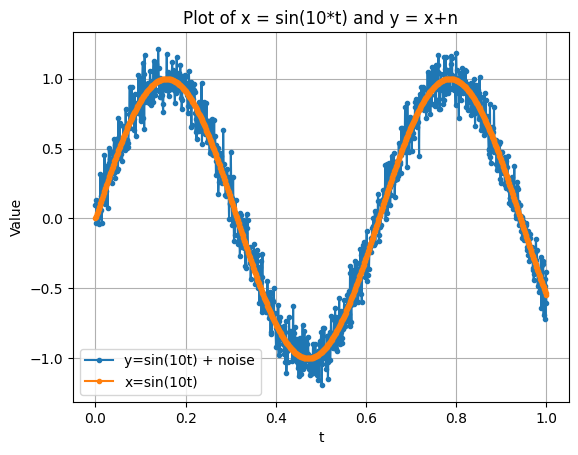

In [253]:
num_elements = 1000
t = np.linspace(0, 1, num_elements)
x = np.sin(10*t)
n = np.random.normal(0, 0.1, x.size)
y= x + gaussian_noise

# Create the plot
plt.plot(t, y, label='y=sin(10t) + noise', marker='.')
plt.plot(t, x, label='x=sin(10t)', marker='.')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of x = sin(10*t) and y = x+n')
plt.legend()
plt.grid(True)
plt.show()

(b) Create a function makeL(N) to create the matrix L for a given dimension N. Hint: Use
scipy.sparse.coo matrix to create a sparse matrix. For debugging purpose, check the matrix
L for, e.g., N = 5.

In [259]:
def makeL(N):
    # Create arrays to store the row indices, column indices, and values of the matrix
    row_indices = []
    col_indices = []
    data = []

    # Construct the matrix L
    for i in range(N - 1):
        row_indices.append(i)
        col_indices.append(i)
        data.append(-1)
        row_indices.append(i)
        col_indices.append(i + 1)
        data.append(1)

    L = coo_matrix((data, (row_indices, col_indices)), shape=(N, N))

    return L

# Example usage
N = 5
L5 = makeL(N)
L5_dense = L5.toarray()
print(L5_dense)

[[-1  1  0  0  0]
 [ 0 -1  1  0  0]
 [ 0  0 -1  1  0]
 [ 0  0  0 -1  1]
 [ 0  0  0  0  0]]


(c) Write down the solution for x to Eq. (2) and write a function solve l2(y, lambda) to compute
the solution. 

**the solution is:**
$$x^{*}=(I^{T}T + \lambda L^{T}L)^{-1}I^{T}y$$

In [260]:
def solve_l2(y, lambd):
    pseudo_inv = eye(y.size).dot(eye(y.size))+lambd*L.T.dot(L)
    b = eye(y.size).dot(y)
    solved = spsolve(pseudo_inv,b)
    return solved


(d) Compute the solution for λ = [0.01, 1, 10, 100] and plot the results. What can you observe?

**Observation:**

Higher regularization leads to smoother signal that more resembles the original signal x without noise added.

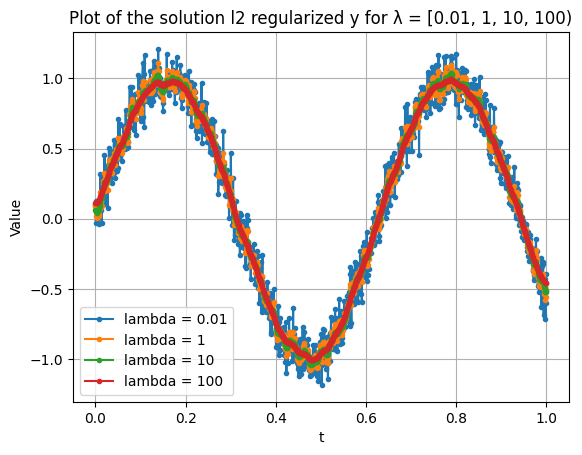

In [261]:
lambd = np.array([0.01, 1, 10, 100])
xsin_0 = solve_l2(y,lambd[0]) # solution for lambda = 0.01
xsin_1 = solve_l2(y,lambd[1]) # solution for lambda = 1
xsin_2 = solve_l2(y,lambd[2]) # solution for lambda = 10
xsin_3 = solve_l2(y,lambd[3]) # solution for lambda = 100

# Create the plot
plt.plot(t, xsin_0, label='lambda = 0.01', marker='.')
plt.plot(t, xsin_1, label='lambda = 1', marker='.')
plt.plot(t, xsin_2, label='lambda = 10', marker='.')
plt.plot(t, xsin_3, label='lambda = 100', marker='.')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of the solution l2 regularized y for λ = [0.01, 1, 10, 100)')
plt.legend()
plt.grid(True)
plt.show()

(e) Generate a step signal x(t) ∈ R^1000

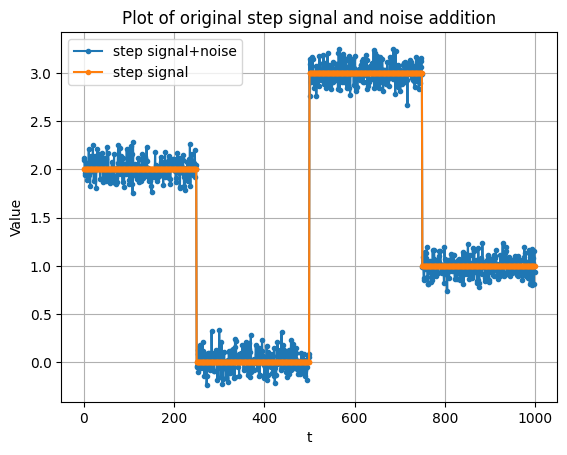

In [176]:
t = np.arange(num_elements)  
step_signal = np.piecewise(t, [t < 250, (t >= 250) & (t < 500), (t >= 500) & (t < 750), t >= 750], [2, 0, 3, 1])
ystep = step_signal + gaussian_noise
xstep_0 = solve_l2(ystep,lambd[0]) # solution for lambda = 0.01
xstep_1 = solve_l2(ystep,lambd[1]) # solution for lambda = 1
xstep_2 = solve_l2(ystep,lambd[2]) # solution for lambda = 10
xstep_3 = solve_l2(ystep,lambd[3]) # solution for lambda = 100

plt.plot(t, ystep, label='step signal+noise', marker='.')
plt.plot(t, step_signal, label='step signal', marker='.')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of original step signal and noise addition')
plt.legend()
plt.grid(True)
plt.show()

**Observation**: Applying l2 regularization cause the step signal to become smooth, the jump between signal becomes less obvious

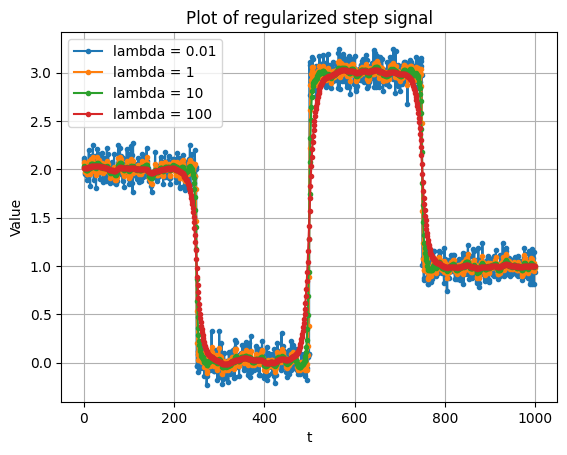

In [175]:
plt.plot(t, xstep_0, label='lambda = 0.01', marker='.')
plt.plot(t, xstep_1, label='lambda = 1', marker='.')
plt.plot(t, xstep_2, label='lambda = 10', marker='.')
plt.plot(t, xstep_3, label='lambda = 100', marker='.')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of l2 regularized step signal')
plt.legend()
plt.grid(True)
plt.show()

(f) Write a function solve l1 dual(y, lambda) to compute Eq. (8) for 1000 iterations. Compute
and return the optimal solution x

In [262]:
def project_onto_set(z, lambd):
    projected_z = np.minimum(np.maximum(z,-lambd),lambd)
    return projected_z

def solve_l1_dual(y, lambd):
    tao = 0.5
    mu = np.random.rand(y.size)
    for i in range(1000):
        mu = project_onto_set(mu + tao*(-0.5*(L.dot(L.T)).dot(mu) + L.dot(y)), lambd)

    return y-0.5*(L.T).dot(mu)



(g) Compute the solution for l1 regularization for λ = [0.01, 0.1, 1, 10] using the signals from (a) and
(e). Describe your observations.

(i) signals from (a)

**Obeservation**: Not much difference between l1 and l2 regularization of the sin(10t) signal

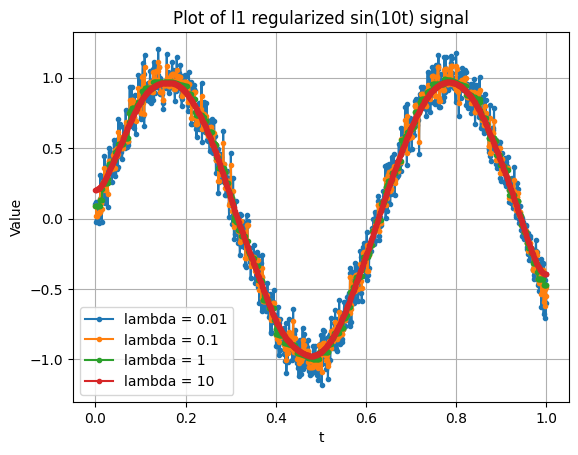

In [265]:
lambd2 = np.array([0.01, 0.1, 1, 10])

ysinl1_0 = solve_l1_dual(y,lambd2[0]) 
ysinl1_1 = solve_l1_dual(y,lambd2[1])
ysinl1_2 = solve_l1_dual(y,lambd2[2])
ysinl1_3 = solve_l1_dual(y,lambd2[3])

plt.plot(t, ysinl1_0, label='lambda = 0.01', marker='.')
plt.plot(t, ysinl1_1, label='lambda = 0.1', marker='.')
plt.plot(t, ysinl1_2, label='lambda = 1', marker='.')
plt.plot(t, ysinl1_3, label='lambda = 10', marker='.')

plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of l1 regularized sin(10t) signal')
plt.legend()
plt.grid(True)
plt.show()

(ii) signals from (e)

**Obeservation**: Noticable difference between l1 and l2 regularization especially in the 'jump' between step sizes is maintained

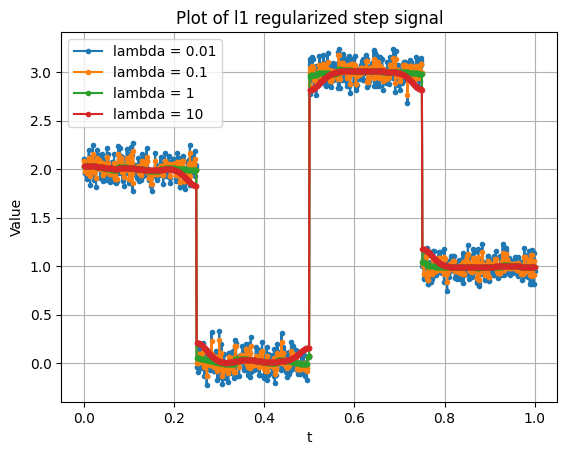

In [269]:
ystepl1_0 = solve_l1_dual(ystep,lambd2[0]) 
ystepl1_1 = solve_l1_dual(ystep,lambd2[1])
ystepl1_2 = solve_l1_dual(ystep,lambd2[2])
ystepl1_3 = solve_l1_dual(ystep,lambd2[3])

plt.plot(t, ystepl1_0, label='lambda = 0.01', marker='.')
plt.plot(t, ystepl1_1, label='lambda = 0.1', marker='.')
plt.plot(t, ystepl1_2, label='lambda = 1', marker='.')
plt.plot(t, ystepl1_3, label='lambda = 10', marker='.')
plt.xlabel('t')
plt.ylabel('Value')
plt.title('Plot of l1 regularized step signal')
plt.legend()
plt.grid(True)
plt.show()

### Result Discussion

There are not much discernible difference between l1 or l2 regularization on smooth signal such the sin(10t) signal. However, applying l2 regularization to step signal will cause the "jump" between step sizes to become smooth, but this "jump" is preserved when l1 regularization is used.